In [1]:
%cd ../../../../

/home/users/dmoreno2016/ASTROMER/astromer_pe/astromer/presentation/experiments/astromer_1_pe


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import glob
import toml
import os

In [3]:
pretraining_path = 'results/pretraining/P05R02/exp_002'
finetuning_path = 'results/finetuning/P05R02/exp_002'

datasets_names = ['alcock', 'atlas', 'ogle']
subsets = [500]
folds = [0, 1, 2]

In [4]:
#datasets_names = ['kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
#subsets = ['all']

#datasets_names = ['alcock', 'atlas', 'ogle', 'kepler', 'kepler_alcock_linear', 'kepler_atlas_linear', 'kepler_ogle_linear']
#subsets = [50]

In [5]:
## Pretraining metrics
dict_logs_pretraining = dict()

for subset_name in subsets:
    if subset_name != 'all':
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets_{}.toml'.format(subset_name))
    else:
        path_metrics = os.path.join(pretraining_path, 'test_metrics_datasets.toml')

    with open(path_metrics, 'r') as f:
        dict_logs_pretraining['{}'.format(subset_name)] = toml.load(f)

In [6]:
dict_logs_pretraining

{'500': {'alcock': {'fold_0': {'loss': 0.1646825522184372,
    'r_square': 0.54217928647995,
    'rmse': 0.1646825522184372},
   'fold_1': {'loss': 0.13735724985599518,
    'r_square': 0.5947884917259216,
    'rmse': 0.13735724985599518},
   'fold_2': {'loss': 0.15509523451328278,
    'r_square': 0.5819466710090637,
    'rmse': 0.15509523451328278}},
  'ogle': {'fold_0': {'loss': 0.1499987095594406,
    'r_square': 0.5634657740592957,
    'rmse': 0.1499987095594406},
   'fold_1': {'loss': 0.1469026803970337,
    'r_square': 0.5596650242805481,
    'rmse': 0.1469026803970337},
   'fold_2': {'loss': 0.15501931309700012,
    'r_square': 0.5656969547271729,
    'rmse': 0.15501931309700012}},
  'atlas': {'fold_0': {'loss': 0.2232280671596527,
    'r_square': 0.4687611758708954,
    'rmse': 0.2232280671596527},
   'fold_1': {'loss': 0.20666688680648804,
    'r_square': 0.49952760338783264,
    'rmse': 0.20666688680648804},
   'fold_2': {'loss': 0.22273224592208862,
    'r_square': 0.48831087

In [7]:
dict_pt_metrics = {
    'r2': [],
    'rmse': [],
    'time_epoch': [],
    'time_batch': [],
}

In [8]:
for subset in subsets:
    df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
    for ds_name in datasets_names:            
        
        list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
        for fold in folds:
            list_r2.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['r_square'])
            list_rmse.append(dict_logs_pretraining['{}'.format(subset)][ds_name]['fold_{}'.format(fold)]['rmse'])
            list_time_epoch.append(0)
            list_time_batch.append(0)
            
        df_r2.append(pd.DataFrame({ds_name: list_r2}))
        df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
        df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
        df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

    dict_pt_metrics['r2'] = pd.concat(df_r2, axis=1)
    dict_pt_metrics['rmse'] = pd.concat(df_rmse, axis=1)
    dict_pt_metrics['time_epoch'] = pd.concat(df_time_epoch, axis=1)
    dict_pt_metrics['time_batch'] = pd.concat(df_time_batch, axis=1)

In [9]:
for metric_name, dict_results in dict_pt_metrics.items():
    dict_results['fold'] = folds
    dict_results['Trainable layers'] = ['Without FT' for _ in folds]
    dict_pt_metrics['{}'.format(metric_name)] = dict_results

In [10]:
dict_pt_metrics

{'r2':      alcock     atlas      ogle  fold Trainable layers
 0  0.542179  0.468761  0.563466     0       Without FT
 1  0.594788  0.499528  0.559665     1       Without FT
 2  0.581947  0.488311  0.565697     2       Without FT,
 'rmse':      alcock     atlas      ogle  fold Trainable layers
 0  0.164683  0.223228  0.149999     0       Without FT
 1  0.137357  0.206667  0.146903     1       Without FT
 2  0.155095  0.222732  0.155019     2       Without FT,
 'time_epoch':    alcock  atlas  ogle  fold Trainable layers
 0       0      0     0     0       Without FT
 1       0      0     0     1       Without FT
 2       0      0     0     2       Without FT,
 'time_batch':    alcock  atlas  ogle  fold Trainable layers
 0       0      0     0     0       Without FT
 1       0      0     0     1       Without FT
 2       0      0     0     2       Without FT}

## Extract finetuning metrics

In [11]:
## Finetuning metrics

dict_logs_finetuning = dict()
for path_lr_files in glob.glob('{}/*'.format(finetuning_path)):
    lr = path_lr_files.split('/')[-1]

    dict_logs_finetuning[lr] = dict()
    for path_science_cases in glob.glob('{}/*'.format(path_lr_files)):
        spc = path_science_cases.split('/')[-1]

        dict_logs_finetuning[lr][spc] = dict()
        for path_ds_name in glob.glob('{}/*'.format(path_science_cases)):
            ds_name = path_ds_name.split('/')[-1]

            if ds_name in datasets_names:

                dict_logs_finetuning[lr][spc][ds_name] = dict()
                for path_fold in glob.glob('{}/*'.format(path_ds_name)):
                    fold_name = path_fold.split('/')[-1]

                    dict_logs_finetuning[lr][spc][ds_name][fold_name] = dict()
                    for path_subsets in glob.glob('{}/*'.format(path_fold)):
                        #print(path_subsets)
                        subset_name = path_subsets.split('/')[-1]

                        #if subset_name.split('_')[-1] in subsets:
                        
                        with open(os.path.join(path_subsets, 'metrics.toml'), 'r') as f:
                            metrics = toml.load(f)

                        dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name] = dict()
                        #for files in ['metrics', 'time_epoch', 'time_batch']:
                        dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['metrics'] = metrics
                        dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_batch'] = pd.read_csv(os.path.join(path_subsets, 'time_batch.csv'))
                        dict_logs_finetuning[lr][spc][ds_name][fold_name][subset_name]['time_epoch'] = pd.read_csv(os.path.join(path_subsets, 'time_epoch.csv'))


In [12]:
lr = 'lr_1e-4'

In [13]:
dict_ft_metrics = {
    'r2': [],
    'rmse': [],
    'time_epoch': [],
    'time_batch': [],
}

for subset in subsets:

    for i, idx_name in enumerate(list(dict_logs_finetuning[lr].keys())):

        df_r2, df_rmse, df_time_epoch, df_time_batch = [], [], [], []
        for ds_name in datasets_names:            

            list_r2, list_rmse, list_time_epoch, list_time_batch = [], [], [], []
            for fold in folds:
                try:

                    if subset != 'all':
                        list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['test_r_square'])
                        list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['metrics']['test_rmse'])
                        list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_epoch'].time_epoch.values.sum())
                        list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}_{}'.format(ds_name, subset)]['time_batch'].time_batch.values.sum())

                    else:
                        list_r2.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['test_r_square'])
                        list_rmse.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['metrics']['test_rmse'])
                        list_time_epoch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_epoch'].time_epoch.values.sum())
                        list_time_batch.append(dict_logs_finetuning[lr][idx_name][ds_name]['fold_{}'.format(fold)]['{}'.format(ds_name)]['time_batch'].time_batch.values.sum())

                except: 
                    print('We do not have fold {} ({})'.format(fold, ds_name))
                    
            df_r2.append(pd.DataFrame({ds_name: list_r2}))
            df_rmse.append(pd.DataFrame({ds_name: list_rmse}))
            df_time_epoch.append(pd.DataFrame({ds_name: list_time_epoch}))
            df_time_batch.append(pd.DataFrame({ds_name: list_time_batch}))

        dict_ft_metrics['r2'].append(pd.concat(df_r2, axis=1))
        dict_ft_metrics['rmse'].append(pd.concat(df_rmse, axis=1))
        dict_ft_metrics['time_epoch'].append(pd.concat(df_time_epoch, axis=1))
        dict_ft_metrics['time_batch'].append(pd.concat(df_time_batch, axis=1))

        for metric_name, dict_results in dict_ft_metrics.items():
            dict_results[i]['fold'] = folds
            dict_results[i]['Trainable layers'] = ['{}'.format(idx_name) for _ in folds]
            dict_ft_metrics['{}'.format(metric_name)][i] = dict_results[i]
        
    for metric_name, _ in dict_ft_metrics.items():
        dict_ft_metrics[metric_name] = pd.concat(dict_ft_metrics[metric_name])


We do not have fold 1 (ogle)
We do not have fold 1 (ogle)
We do not have fold 1 (ogle)
We do not have fold 1 (ogle)


In [14]:
dict_ft_metrics['r2']

,alcock,atlas,ogle,fold,Trainable layers
0,0.539623,0.450147,0.518071,0,PE
1,0.573825,0.497030,0.492839,1,PE
2,0.558947,0.469249,NaN,2,PE
0,0.587163,0.599849,0.625246,0,FF1_PE_ATT_FF2
1,0.618922,0.617735,0.606298,1,FF1_PE_ATT_FF2
2,0.622542,0.599228,NaN,2,FF1_PE_ATT_FF2
0,0.596203,0.613922,0.635890,0,FF1_ATT_FF2
1,0.617288,0.612066,0.637202,1,FF1_ATT_FF2
2,0.622095,0.626459,NaN,2,FF1_ATT_FF2
0,0.518613,0.478053,0.517636,0,FF1_PE


## RMSE v/s Finetuning time

In [15]:
import seaborn as sns

In [16]:
set_layers_trainable = dict_ft_metrics['r2']['Trainable layers'].unique()

In [17]:
dict_results = {
    'Time training': [],
    'R^2 (PT)': [],
    'R^2 (FT)': [],
    u'Δ R^2 (FT - PT)': [],
    'RMSE (PT)': [],
    'RMSE (FT)': [],
    u'Δ RMSE (PT - FT)': [],
    'Dataset name': [],
    'Trainable layers': [],
    'Fold':[]
}

for dataset_name in datasets_names:

    for layers_trainable in set_layers_trainable:        

        for fold in folds:

            pt_r2_fold = dict_pt_metrics['r2'][dict_pt_metrics['r2'].fold == fold]
            pt_r2_fold_layers = pt_r2_fold[pt_r2_fold['Trainable layers'] == 'Without FT']

            pt_rmse_fold = dict_pt_metrics['rmse'][dict_pt_metrics['rmse'].fold == fold]
            pt_rmse_fold_layers = pt_rmse_fold[pt_rmse_fold['Trainable layers'] == 'Without FT']

            ##################################################################################################

            ft_time_fold = dict_ft_metrics['time_epoch'][dict_ft_metrics['time_epoch'].fold == fold]
            ft_time_fold_layers = ft_time_fold[ft_time_fold['Trainable layers'] == layers_trainable]

            ft_r2_fold = dict_ft_metrics['r2'][dict_ft_metrics['r2'].fold == fold]
            ft_r2_fold_layers = ft_r2_fold[ft_r2_fold['Trainable layers'] == layers_trainable]

            ft_rmse_fold = dict_ft_metrics['rmse'][dict_ft_metrics['rmse'].fold == fold]
            ft_rmse_fold_layers = ft_rmse_fold[ft_rmse_fold['Trainable layers'] == layers_trainable]

            ##################################################################################################

            dict_results['Time training'].append(ft_time_fold_layers[dataset_name].iloc[0])
            
            dict_results['R^2 (PT)'].append(pt_r2_fold_layers[dataset_name].iloc[0])
            dict_results['R^2 (FT)'].append(ft_r2_fold_layers[dataset_name].iloc[0])
            dict_results[u'Δ R^2 (FT - PT)'].append(ft_r2_fold_layers[dataset_name].iloc[0] \
                                                - pt_r2_fold_layers[dataset_name].iloc[0])
            
            dict_results['RMSE (PT)'].append(pt_rmse_fold_layers[dataset_name].iloc[0])
            dict_results['RMSE (FT)'].append(ft_rmse_fold_layers[dataset_name].iloc[0])
            dict_results[u'Δ RMSE (PT - FT)'].append(pt_rmse_fold_layers[dataset_name].iloc[0] \
                                                - ft_rmse_fold_layers[dataset_name].iloc[0])

            dict_results['Dataset name'].append(dataset_name.upper())
            dict_results['Trainable layers'].append(layers_trainable)
            dict_results['Fold'].append(fold)

df_results = pd.DataFrame(dict_results)
df_results

,Time training,R^2 (PT),R^2 (FT),Δ R^2 (FT - PT),RMSE (PT),RMSE (FT),Δ RMSE (PT - FT),Dataset name,Trainable layers,Fold
0,47.770770,0.542179,0.539623,-0.002556,0.164683,0.160482,0.004200,ALCOCK,PE,0
1,60.531240,0.594788,0.573825,-0.020964,0.137357,0.136627,0.000730,ALCOCK,PE,1
2,49.596046,0.581947,0.558947,-0.023000,0.155095,0.152912,0.002183,ALCOCK,PE,2
3,143.973745,0.542179,0.587163,0.044984,0.164683,0.152538,0.012145,ALCOCK,FF1_PE_ATT_FF2,0
4,118.672543,0.594788,0.618922,0.024133,0.137357,0.129523,0.007835,ALCOCK,FF1_PE_ATT_FF2,1
5,129.506741,0.581947,0.622542,0.040595,0.155095,0.143542,0.011554,ALCOCK,FF1_PE_ATT_FF2,2
6,73.999617,0.542179,0.596203,0.054023,0.164683,0.150064,0.014618,ALCOCK,FF1_ATT_FF2,0
7,50.706603,0.594788,0.617288,0.022499,0.137357,0.131010,0.006347,ALCOCK,FF1_ATT_FF2,1
8,110.505636,0.581947,0.622095,0.040148,0.155095,0.143334,0.011761,ALCOCK,FF1_ATT_FF2,2
9,60.910528,0.542179,0.518613,-0.023566,0.164683,0.164602,0.000081,ALCOCK,FF1_PE,0


In [18]:
df_results = df_results.dropna().reset_index(drop=True)
df_results

,Time training,R^2 (PT),R^2 (FT),Δ R^2 (FT - PT),RMSE (PT),RMSE (FT),Δ RMSE (PT - FT),Dataset name,Trainable layers,Fold
0,47.770770,0.542179,0.539623,-0.002556,0.164683,0.160482,0.004200,ALCOCK,PE,0
1,60.531240,0.594788,0.573825,-0.020964,0.137357,0.136627,0.000730,ALCOCK,PE,1
2,49.596046,0.581947,0.558947,-0.023000,0.155095,0.152912,0.002183,ALCOCK,PE,2
3,143.973745,0.542179,0.587163,0.044984,0.164683,0.152538,0.012145,ALCOCK,FF1_PE_ATT_FF2,0
4,118.672543,0.594788,0.618922,0.024133,0.137357,0.129523,0.007835,ALCOCK,FF1_PE_ATT_FF2,1
5,129.506741,0.581947,0.622542,0.040595,0.155095,0.143542,0.011554,ALCOCK,FF1_PE_ATT_FF2,2
6,73.999617,0.542179,0.596203,0.054023,0.164683,0.150064,0.014618,ALCOCK,FF1_ATT_FF2,0
7,50.706603,0.594788,0.617288,0.022499,0.137357,0.131010,0.006347,ALCOCK,FF1_ATT_FF2,1
8,110.505636,0.581947,0.622095,0.040148,0.155095,0.143334,0.011761,ALCOCK,FF1_ATT_FF2,2
9,60.910528,0.542179,0.518613,-0.023566,0.164683,0.164602,0.000081,ALCOCK,FF1_PE,0


In [19]:
df_pt_results = df_results.drop_duplicates(subset=['R^2 (PT)'])
df_pt_results['Trainable layers'] = 'Pretraining'
df_pt_results['R^2 (FT)'] = df_pt_results['R^2 (PT)']
df_pt_results

/tmp/ipykernel_31207/552464588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt_results['Trainable layers'] = 'Pretraining'
/tmp/ipykernel_31207/552464588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pt_results['R^2 (FT)'] = df_pt_results['R^2 (PT)']


,Time training,R^2 (PT),R^2 (FT),Δ R^2 (FT - PT),RMSE (PT),RMSE (FT),Δ RMSE (PT - FT),Dataset name,Trainable layers,Fold
0,47.770770,0.542179,0.542179,-0.002556,0.164683,0.160482,0.004200,ALCOCK,Pretraining,0
1,60.531240,0.594788,0.594788,-0.020964,0.137357,0.136627,0.000730,ALCOCK,Pretraining,1
2,49.596046,0.581947,0.581947,-0.023000,0.155095,0.152912,0.002183,ALCOCK,Pretraining,2
12,52.482830,0.468761,0.468761,-0.018614,0.223228,0.291001,-0.067773,ATLAS,Pretraining,0
13,42.919760,0.499528,0.499528,-0.002498,0.206667,0.264875,-0.058208,ATLAS,Pretraining,1
14,39.783599,0.488311,0.488311,-0.019062,0.222732,0.291227,-0.068494,ATLAS,Pretraining,2
24,86.854225,0.563466,0.563466,-0.045394,0.149999,0.145078,0.004921,OGLE,Pretraining,0
25,106.699512,0.559665,0.559665,-0.066826,0.146903,0.150568,-0.003665,OGLE,Pretraining,1


In [20]:
df_results_final = pd.concat([df_results, df_pt_results]).reset_index(drop=True)
df_results_final

,Time training,R^2 (PT),R^2 (FT),Δ R^2 (FT - PT),RMSE (PT),RMSE (FT),Δ RMSE (PT - FT),Dataset name,Trainable layers,Fold
0,47.770770,0.542179,0.539623,-0.002556,0.164683,0.160482,0.004200,ALCOCK,PE,0
1,60.531240,0.594788,0.573825,-0.020964,0.137357,0.136627,0.000730,ALCOCK,PE,1
2,49.596046,0.581947,0.558947,-0.023000,0.155095,0.152912,0.002183,ALCOCK,PE,2
3,143.973745,0.542179,0.587163,0.044984,0.164683,0.152538,0.012145,ALCOCK,FF1_PE_ATT_FF2,0
4,118.672543,0.594788,0.618922,0.024133,0.137357,0.129523,0.007835,ALCOCK,FF1_PE_ATT_FF2,1
5,129.506741,0.581947,0.622542,0.040595,0.155095,0.143542,0.011554,ALCOCK,FF1_PE_ATT_FF2,2
6,73.999617,0.542179,0.596203,0.054023,0.164683,0.150064,0.014618,ALCOCK,FF1_ATT_FF2,0
7,50.706603,0.594788,0.617288,0.022499,0.137357,0.131010,0.006347,ALCOCK,FF1_ATT_FF2,1
8,110.505636,0.581947,0.622095,0.040148,0.155095,0.143334,0.011761,ALCOCK,FF1_ATT_FF2,2
9,60.910528,0.542179,0.518613,-0.023566,0.164683,0.164602,0.000081,ALCOCK,FF1_PE,0


In [21]:
#df_results.to_pickle('datasets_al_at_og_500.pkl')

In [22]:
def get_r2_positive(df):
  for i, row in df.iterrows():
      if row['R^2 (FT)'] < 0:
          df.at[i, 'R^2 (FT)'] = 0
          df.at[i, 'R^2 (FT)'] = 0

      if row['R^2 (PT)'] < 0:
          df.at[i, 'R^2 (PT)'] = 0
          df.at[i, 'R^2 (PT)'] = 0
          
  return df

def bar_plot_pt(df, x, y, title):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                  y = y,
                  data = df).set(title=title)

  #place legend outside top right corner of plot
  #plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)

  # Show the plot
  plt.show()


def bar_plot_ft(df, x, y, title, pt_ft=False):
  # who v/s fare barplot
  ax = sns.barplot(x = x,
                   y = y,
                   hue = 'Trainable layers',
                   data = df,
                   errorbar = 'sd').set(title=title)

  #place legend outside top right corner of plot
  plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
  plt.xticks(rotation=45)
  
  if pt_ft:
    flt_df_pt = df[df['Trainable layers'] == 'Pretraining']

    #for name_ds in flt_df_pt['Dataset name'].unique():
    #  mean_pt_ds = flt_df_pt[flt_df_pt['Dataset name'] == name_ds]['R^2 (PT)'].mean()
    #  plt.axhline(y=mean_pt_ds, color='r', linestyle='--')
    
    #mean_pt_ds = flt_df_pt[flt_df_pt['Dataset name'] == 'ATLAS']['R^2 (PT)'].mean()
    #plt.axhline(y=mean_pt_ds, color='r', linestyle='--')

  plt.ylim(0, 0.75)

  # Show the plot
  plt.show()

In [23]:
final_datasets_al_at_og_500 = get_r2_positive(df_results)
final_datasets_al_at_og_500

,Time training,R^2 (PT),R^2 (FT),Δ R^2 (FT - PT),RMSE (PT),RMSE (FT),Δ RMSE (PT - FT),Dataset name,Trainable layers,Fold
0,47.770770,0.542179,0.539623,-0.002556,0.164683,0.160482,0.004200,ALCOCK,PE,0
1,60.531240,0.594788,0.573825,-0.020964,0.137357,0.136627,0.000730,ALCOCK,PE,1
2,49.596046,0.581947,0.558947,-0.023000,0.155095,0.152912,0.002183,ALCOCK,PE,2
3,143.973745,0.542179,0.587163,0.044984,0.164683,0.152538,0.012145,ALCOCK,FF1_PE_ATT_FF2,0
4,118.672543,0.594788,0.618922,0.024133,0.137357,0.129523,0.007835,ALCOCK,FF1_PE_ATT_FF2,1
5,129.506741,0.581947,0.622542,0.040595,0.155095,0.143542,0.011554,ALCOCK,FF1_PE_ATT_FF2,2
6,73.999617,0.542179,0.596203,0.054023,0.164683,0.150064,0.014618,ALCOCK,FF1_ATT_FF2,0
7,50.706603,0.594788,0.617288,0.022499,0.137357,0.131010,0.006347,ALCOCK,FF1_ATT_FF2,1
8,110.505636,0.581947,0.622095,0.040148,0.155095,0.143334,0.011761,ALCOCK,FF1_ATT_FF2,2
9,60.910528,0.542179,0.518613,-0.023566,0.164683,0.164602,0.000081,ALCOCK,FF1_PE,0


In [24]:
import warnings
warnings.filterwarnings('ignore')

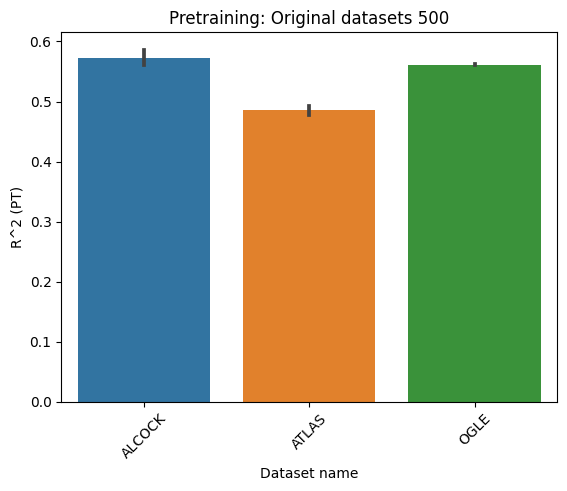

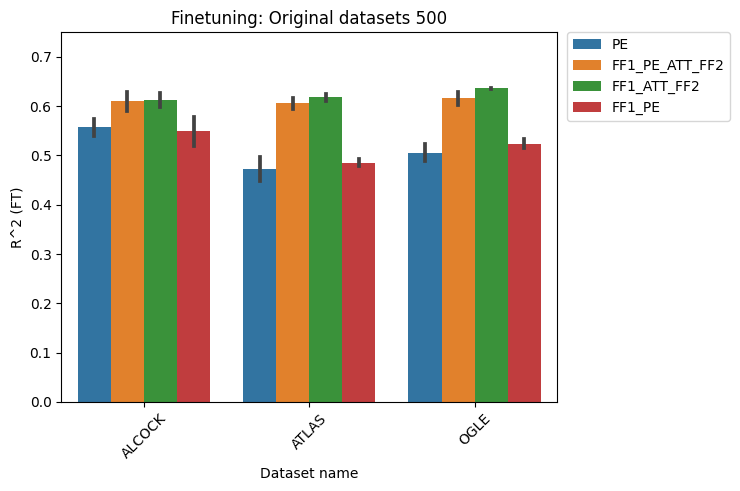

In [25]:
x = 'Dataset name'
y = 'R^2 (PT)'
title = 'Pretraining: Original datasets 500'

bar_plot_pt(final_datasets_al_at_og_500, x, y, title)

print("")

x = 'Dataset name'
y = 'R^2 (FT)'
title = 'Finetuning: Original datasets 500'

bar_plot_ft(final_datasets_al_at_og_500, x, y, title)

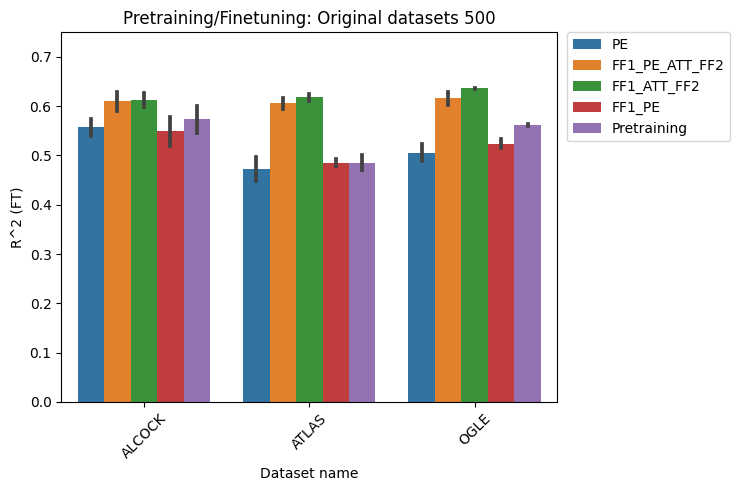

In [26]:
x = 'Dataset name'
y = 'R^2 (FT)'
title = 'Pretraining/Finetuning: Original datasets 500'

bar_plot_ft(df_results_final, x, y, title, pt_ft=True)

## Pretraining evaluated directly in the datasets

In [75]:
df_results_filtered = df_results[df_results['Dataset name'] != 'ATLAS']
df_results_filtered

,Time Mean,Δ R^2 Mean,Δ RMSE Mean,Time Std,Δ R^2 Std,Δ RMSE Std,Dataset name,Trainable layers
0,91.066089,-0.001906,-0.000573,15.077792,0.004831,0.001698,ALCOCK,PE
1,256.629807,0.001123,0.000276,50.374743,0.003685,0.000873,ALCOCK,FF1_PE_ATT_FF2
2,174.979159,0.006132,0.000700,68.466115,0.000856,0.000906,ALCOCK,FF1_ATT_FF2
3,81.779074,-0.001386,0.000028,13.378001,0.001935,0.000783,ALCOCK,FF1_PE
8,349.037878,-0.002915,0.000979,43.793981,0.049844,0.001599,OGLE,PE
9,1092.578019,0.130629,0.008232,366.608726,0.004473,0.000225,OGLE,FF1_PE_ATT_FF2
10,981.372653,0.127116,0.007790,112.541414,0.005090,0.000266,OGLE,FF1_ATT_FF2
11,432.006693,0.042958,0.002641,121.378258,0.047326,0.001348,OGLE,FF1_PE


In [18]:
df_results_filtered = df_results.copy()

/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/users/dmoreno2016/miniconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

Text(0.5, 29.000000000000014, 'Training time')

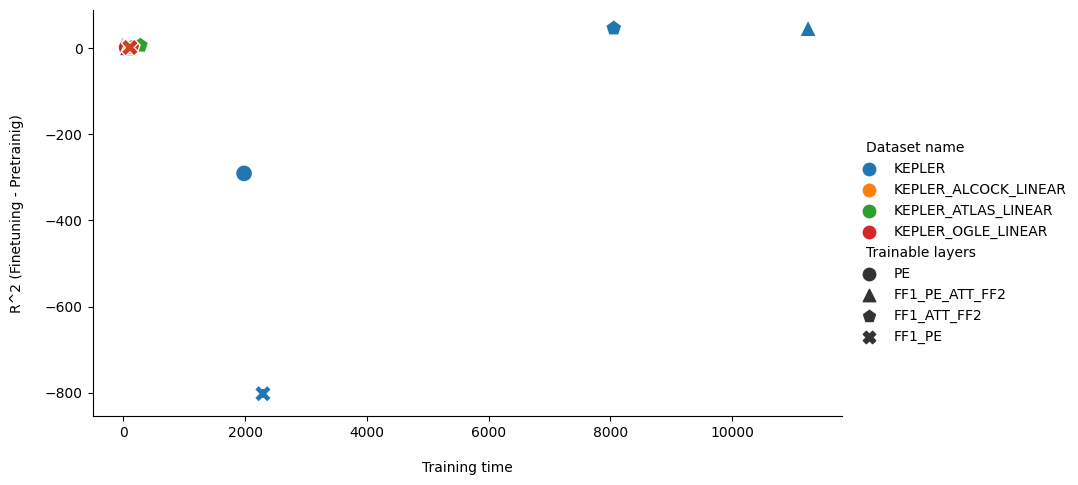

In [19]:
markers_set=['o', '^', 'p', 'X']


ax = sns.relplot(data=df_results_filtered, x='Time Mean', y=u'Δ R^2 Mean', hue='Dataset name', style='Trainable layers', s=150, height=4.8, aspect=1.8,
                 markers=markers_set)

markers, caps, bars = ax.ax.errorbar(df_results_filtered['Time Mean'], df_results_filtered[u'Δ R^2 Mean'],
                                     yerr=df_results_filtered[u'Δ R^2 Std'],
                                     #xerr=df_results['Time Std'],
                                     fmt='o',
                                     markersize=10,
                                     zorder=1, )

markers.set_markerfacecolor((1, 1, 0, 0.01))

for lh in ax._legend.legendHandles: 
    lh.set_alpha(1)
    lh._sizes = [80] 

plt.ylabel('R^2 (Finetuning - Pretrainig)', labelpad=15)
plt.xlabel('Training time', labelpad=15)